## _Embedding Stage_

In [1]:
import glob, os, sys, yaml

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pprint
import seaborn as sns
import trackml.dataset

In [4]:
import torch
from torch_geometric.data import Data
import itertools

In [5]:
# select a device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [6]:
# append parent dir to the path to load parent modules
# sys.path.append(os.path.abspath('..'))
sys.path.append(os.pardir)  # os.pardir ~ '..'

In [10]:
# set EXATRKX_DATA env variable
# os.environ['EXATRKX_DATA'] = os.path.join(os.path.abspath('..'), 'data_sets/pandaml/')
os.environ['EXATRKX_DATA'] = os.path.join(os.pardir, 'data_sets/pandaml/')

### _(+) - Config File_

In [13]:
# load processing config file
config_file = '../LightningModules/Processing/prepare_quickstart.yaml'
with open(config_file) as f:
    try:
        config = yaml.load(f, Loader=yaml.FullLoader) # equiv: yaml.full_load(f)
    except yaml.YAMLError as e:
        print(e)

In [9]:
# see processing config file
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(config)

{ 'input_dir': '${EXATRKX_DATA}/train_all',
  'layerwise': True,
  'modulewise': True,
  'n_files': 1000,
  'n_tasks': 1,
  'n_workers': 8,
  'noise': True,
  'output_dir': '${HOME}/current/5_exatrkx/stttrkx-hsf/run/feature_store',
  'overwrite': False}


In [10]:
# change some params here
config['n_files'] = 10

### _(+) - Input Data (Processing)_

In [11]:
# Path to feature_store, use os.path.expandvars for ${HOME}
FEATURE_DATA = os.path.expandvars(config['output_dir'])
print(FEATURE_DATA)

/home/adeel/current/5_exatrkx/stttrkx-hsf/run/feature_store


In [12]:
# examine an event, give integer value to event_id
event_id = 0
feature_data = torch.load(os.path.join(FEATURE_DATA, str(event_id)), map_location=device)
print("Length of Data: {}".format(len(feature_data)))

Length of Data: 8


In [13]:
feature_data

Data(x=[240, 3], pid=[240], layers=[240], event_file='/home/adeel/current/3_deeptrkx/stttrkx-hsf/train_all/event0000000000', hid=[240], pt=[240], modulewise_true_edges=[2, 229], layerwise_true_edges=[2, 234])

In [14]:
# features x = [r, phi, z]
feature_data.x[:10]

tensor([[ 0.2882,  0.1450, -0.1021],
        [ 0.2983,  0.1457, -0.1022],
        [ 0.2581, -0.7947,  0.1956],
        [ 0.3374,  0.1484, -0.1089],
        [ 0.3475,  0.1490, -0.1089],
        [ 0.1663, -0.3430,  0.3500],
        [ 0.1663,  0.6763,  0.3500],
        [ 0.1669, -0.0289,  0.3500],
        [ 0.1669,  0.3623,  0.3500],
        [ 0.1681,  0.3813,  0.3500]])

In [15]:
feature_data.pid[:10]

tensor([ 4.,  4., 10.,  4.,  4.,  7.,  5.,  8.,  9.,  1., 10.,  3.,  7.,  6.,
         8.,  9.,  5.,  1.,  3.,  2.,  4., 10., 10.,  7.,  5.,  9.,  8.,  6.,
         1.,  3.,  4.,  2.,  6., 10.,  4.,  5.,  9.,  7.,  8.,  1.,  3.,  6.,
         2.,  4.,  7.,  5.,  9.,  8., 10.,  1.,  3.,  2.,  6.,  6.,  4.,  5.,
         7.,  9.,  8.,  6.,  1.,  3., 10.,  2.,  7.,  4.,  5.,  9.,  8.,  1.,
         3.,  6., 10.,  2.,  7.,  5., 10.,  8.,  9.,  4.,  3.,  1.,  6.,  2.,
        10.,  9.,  1.,  7.,  5.,  4.,  3., 10.,  6.,  2., 10.,  6.,  8.,  9.,
         1.,  5.,  7.,  3.,  4.,  4., 10.,  2.,  6.,  8.,  7.,  8.,  5.,  9.,
         4.,  3.,  2.,  1.,  8.,  7.,  9.,  5.,  3.,  1.,  2.,  9.,  1.,  7.,
         5.,  3.,  2.,  6.,  9.,  8.,  7.,  3.,  1.,  5.,  2.,  4.,  6.,  8.,
         8.,  7.,  9.,  5.,  3.,  2.,  4.,  1.,  7.,  8.,  5.,  3.,  9.,  2.,
         1.,  7.,  9.,  3.,  5.,  6.,  1.,  2.,  8.,  3.,  9.,  7.,  5.,  1.,
         6.,  8.,  2.,  6.,  3.,  9.,  7.,  5.,  1.,  3.,  9.,  

In [16]:
feature_data.hid[:10]

tensor([155, 156,  10, 159, 160,  67, 118,  49,  23, 216,   9, 166,  68,  94,
         50,  24, 119, 217, 167, 192, 144,   1,  11,  69, 120,  25,  51,  95,
        218, 168, 145, 193, 104,   2, 146, 121,  26,  70,  52, 219, 169,  96,
        194, 147,  71, 122,  27,  53,   3, 220, 170, 195,  97, 105, 148, 123,
         72,  28,  54,  98, 221, 171,   4, 196,  73, 149, 124,  29,  55, 222,
        172,  99,   5, 197,  74, 125,  14,  56,  30, 150, 173, 223, 100, 198,
          6,  31, 224,  75, 126, 151, 174,  15, 101, 199,   7, 102,  57,  32,
        225, 127,  76, 175, 152, 153,   8, 200, 103,  58,  77,  59, 128,  33,
        154, 176, 201, 226,  60,  78,  34, 129, 177, 227, 202,  35, 228,  79,
        130, 178, 203, 106,  36,  61,  80, 179, 229, 131, 204, 157, 107,  62,
         63,  81,  37, 132, 180, 205, 158, 230,  82,  64, 133, 181,  38, 206,
        231,  83,  39, 182, 134, 108, 232, 207,  65, 183,  40,  84, 135, 233,
        109,  66, 208, 110, 184,  41,  85, 136, 234, 185,  42,  

In [17]:
feature_data.pt[:10]

tensor([0.6098, 0.6097, 0.3184, 0.6098, 0.6097, 1.0319, 0.5786, 0.2222, 0.8135,
        1.0237, 0.3182, 0.1690, 1.0318, 1.3867, 0.2220, 0.8134, 0.5784, 1.0236,
        0.1689, 0.5979, 0.6095, 0.3179, 0.3181, 1.0316, 0.5784, 0.8134, 0.2219,
        1.3867, 1.0237, 0.1690, 0.6096, 0.5978, 1.3866, 0.3184, 0.6097, 0.5787,
        0.8134, 1.0315, 0.2219, 1.0237, 0.1690, 1.3866, 0.5975, 0.6097, 1.0318,
        0.5786, 0.8136, 0.2217, 0.3183, 1.0238, 0.1675, 0.5975, 1.3866, 1.3866,
        0.6087, 0.5788, 1.0320, 0.8135, 0.2214, 1.3866, 1.0238, 0.1657, 0.3180,
        0.5976, 1.0320, 0.6090, 0.5789, 0.8136, 0.2214, 1.0238, 0.1657, 1.3866,
        0.3180, 0.5978, 1.0319, 0.5793, 0.3170, 0.2214, 0.8137, 0.6093, 0.1656,
        1.0240, 1.3866, 0.5980, 0.3179, 0.8139, 1.0240, 1.0317, 0.5794, 0.6097,
        0.1656, 0.3169, 1.3866, 0.5982, 0.3178, 1.3867, 0.2212, 0.8140, 1.0240,
        0.5793, 1.0316, 0.1655, 0.6097, 0.6097, 0.3180, 0.5982, 1.3867, 0.2209,
        1.0310, 0.2209, 0.5793, 0.8141, 

In [18]:
feature_data.modulewise_true_edges

tensor([[  0,   1,   3,   4,  20,  30,  34,  43,  54,  65,  79,  89, 102, 103,
         112, 137, 146, 187, 200, 210, 220,   2,  10,  21,  22,  33,  48,  62,
          72,  76,  84,  91,  94, 104, 198, 202, 212, 222, 235, 236, 237, 238,
           5,  12,  23,  37,  44,  56,  64,  74,  87, 100, 108, 117, 125, 132,
         141, 148, 155, 165, 174, 179, 186, 196, 206, 214, 225,   6,  16,  24,
          35,  45,  55,  66,  75,  88,  99, 110, 119, 126, 135, 143, 150, 158,
         166, 175, 182, 189, 199, 208, 209, 218,   7,  14,  26,  38,  47,  58,
          68,  77,  96, 107, 109, 116, 131, 139, 140, 149, 162,   8,  15,  25,
          36,  46,  57,  67,  78,  85,  97, 111, 118, 123, 130, 142, 152, 156,
         164, 173, 178, 185, 195, 204, 215, 223,   9,  17,  28,  39,  49,  60,
          69,  81,  86,  98, 115, 121, 124, 134, 147, 154, 160, 167, 176, 183,
         191, 201, 211, 219,  11,  18,  29,  40,  50,  61,  70,  80,  90, 101,
         113, 120, 127, 133, 144, 151, 157, 163, 172

In [19]:
feature_data.layerwise_true_edges

tensor([[  9,  17,  28,  39,  49,  60,  69,  81,  86,  98, 115, 121, 124, 134,
         147, 154, 160, 167, 176, 183, 191, 201, 211, 219,  19,  31,  42,  51,
          63,  73,  83,  93, 105, 114, 122, 128, 136, 145, 153, 161, 170, 180,
         190, 193, 205, 216, 221,  11,  18,  29,  40,  50,  61,  70,  80,  90,
         101, 113, 120, 127, 133, 144, 151, 157, 163, 172, 177, 184, 194, 203,
         213, 224,   0,   1,   3,   4,  20,  20,  30,  34,  43,  54,  65,  79,
          89, 102, 103, 112, 137, 146, 187, 200, 210, 220,   6,  16,  24,  35,
          45,  55,  66,  75,  88,  99, 110, 119, 126, 135, 143, 150, 158, 166,
         175, 182, 189, 199, 199, 208, 209, 218,  13,  27,  32,  41,  52,  53,
          59,  71,  82,  92,  95, 106, 129, 138, 159, 168, 171, 181, 188, 192,
         207, 217, 227,   5,  12,  23,  37,  44,  56,  64,  74,  87, 100, 108,
         117, 125, 132, 141, 148, 155, 165, 174, 179, 186, 186, 196, 197, 206,
         214, 225,   7,  14,  26,  38,  47,  58,  68

### _(+) - Embedding_

- training has already been done using `TrainTrack`.
- examine the embedding e.g. view embedding space etc, etc.

In [20]:
from LightningModules.Embedding.Models.layerless_embedding import LayerlessEmbedding

In [21]:
# load hparams from config file
config_file = "LightningModules/Embedding/train_quickstart_embedding.yaml"
with open(config_file) as f:
    hparams = yaml.load(f, Loader=yaml.FullLoader)

In [22]:
# see hparams used in this stage
pp = pprint.PrettyPrinter(indent=2)
pp.pprint(hparams)

{ 'activation': 'Tanh',
  'callbacks': [['EmbeddingBuilder']],
  'cell_channels': 8,
  'emb_dim': 12,
  'emb_hidden': 1024,
  'factor': 0.3,
  'input_dir': '${EXATRKX_DATA}/run/feature_store',
  'knn': 100,
  'lr': 0.01,
  'margin': 0.1,
  'max_epochs': 10,
  'n_workers': 8,
  'nb_layer': 4,
  'noise': False,
  'output_dir': '${EXATRKX_DATA}/run/embedding_processed',
  'overwrite': True,
  'patience': 20,
  'points_per_batch': 10000,
  'project': 'EmbeddingStudy',
  'pt_background_cut': 0.0,
  'pt_signal_cut': 0.0,
  'r_test': 0.1,
  'r_train': 0.1,
  'r_val': 0.1,
  'randomisation': 1,
  'regime': [['rp', 'hnm']],
  'spatial_channels': 3,
  'train_split': [[800, 100, 100]],
  'true_edges': 'modulewise_true_edges',
  'warmup': 500,
  'weight': 2}


In [23]:
# Layerless Embedding
e_model = LayerlessEmbedding(hparams)

In [24]:
print(e_model)

LayerlessEmbedding(
  (network): Sequential(
    (0): Linear(in_features=3, out_features=1024, bias=True)
    (1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (2): Tanh()
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (5): Tanh()
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (8): Tanh()
    (9): Linear(in_features=1024, out_features=1024, bias=True)
    (10): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (11): Tanh()
    (12): Linear(in_features=1024, out_features=12, bias=True)
  )
)


### _(+) Loading Checkpoints_

After training finishes, use `checkpoint_callback.best_model_path` to retrieve the path to the best checkpoint file and `checkpoint_callback.best_model_score` to retrieve its score.

In [25]:
# checkpoint dir
e_checkpoint = "run/lightning_models/lightning_checkpoints/EmbeddingStudy/version_0/checkpoints/last.ckpt"

In [26]:
# load checkpoint
e_model = e_model.load_from_checkpoint(checkpoint_path=e_checkpoint, hparam=hparams)

In [27]:
e_model.eval()

LayerlessEmbedding(
  (network): Sequential(
    (0): Linear(in_features=3, out_features=1024, bias=True)
    (1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (2): Tanh()
    (3): Linear(in_features=1024, out_features=1024, bias=True)
    (4): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (5): Tanh()
    (6): Linear(in_features=1024, out_features=1024, bias=True)
    (7): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (8): Tanh()
    (9): Linear(in_features=1024, out_features=1024, bias=True)
    (10): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (11): Tanh()
    (12): Linear(in_features=1024, out_features=12, bias=True)
  )
)

In [28]:
spatial = e_model(feature_data.x)

In [29]:
spatial_np = spatial.detach().numpy()

In [30]:
spatial.shape

torch.Size([240, 12])

In [31]:
feature_data.pid.shape

torch.Size([240])

## _Embedding Data_

In [32]:
# list training output
!ls run/embedding_processed/train

0001  0080  0161  0232	0308  0389  0467  0539	0619  0694  0770  0842	0926
0002  0081  0162  0234	0310  0390  0469  0540	0620  0695  0771  0844	0927
0003  0083  0163  0235	0312  0391  0470  0541	0621  0696  0773  0845	0928
0005  0084  0164  0236	0313  0392  0471  0542	0622  0697  0774  0846	0929
0006  0086  0166  0237	0314  0393  0472  0543	0623  0698  0776  0847	0931
0007  0087  0167  0238	0315  0395  0473  0545	0624  0699  0777  0848	0932
0010  0088  0168  0239	0317  0398  0474  0547	0625  0701  0778  0849	0933
0011  0091  0169  0240	0318  0399  0475  0548	0626  0702  0779  0850	0934
0012  0092  0170  0241	0319  0401  0476  0549	0627  0703  0780  0852	0936
0013  0093  0171  0242	0320  0402  0477  0550	0628  0704  0781  0855	0937
0014  0094  0173  0243	0321  0403  0478  0551	0629  0705  0783  0856	0942
0015  0095  0174  0244	0322  0405  0479  0552	0630  0706  0784  0858	0943
0016  0097  0175  0245	0323  0406  0480  0553	0631  0707  0785  0859	0944
0017  0098  0176  0246	0324  0407  048

In [34]:
embedding_data = torch.load(os.path.join("run/embedding_processed/", "train", "0001"), map_location=device)
print("Length of Data: {}".format(len(embedding_data)))

Length of Data: 12


In [35]:
# train data by embedding stage
embedding_data

Data(x=[252, 3], pid=[252], layers=[252], event_file='/home/adeel/current/3_deeptrkx/stttrkx-hsf/train_all/event0000000001', hid=[252], pt=[252], modulewise_true_edges=[2, 242], layerwise_true_edges=[2, 271], signal_true_edges=[2, 242], edge_index=[2, 3360], y=[3360], y_pid=[3360])

In [36]:
embedding_data.x[:10]

tensor([[ 0.2622, -0.8059,  0.0026],
        [ 0.2723, -0.8069,  0.0026],
        [ 0.2839, -0.8652,  0.0908],
        [ 0.2939, -0.8641,  0.0908],
        [ 0.2587,  0.8703,  0.1666],
        [ 0.3113, -0.8105, -0.0041],
        [ 0.2687,  0.8690,  0.1665],
        [ 0.2735,  0.4380,  0.1681],
        [ 0.3214, -0.8112, -0.0041],
        [ 0.3046,  0.8714,  0.1116]])

In [37]:
embedding_data.pt[:10]

tensor([0.6757, 0.6756, 1.1325, 1.1323, 0.6224, 0.6757, 0.6221, 0.8160, 0.6757,
        0.6225])

In [38]:
# see the corresponding raw data
hits, tubes, particles, truth = trackml.dataset.load_event(embedding_data.event_file)
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-12.2456,12.120,35.0,9,0,12
1,2,-13.1203,12.625,35.0,9,1,117
2,3,-13.9950,13.130,35.0,9,2,228
3,4,-13.9950,14.140,35.0,9,3,344
4,5,-14.8697,14.645,35.0,9,4,467


In [39]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time
0,1,0.0,0.0,0.0,-0.134669,0.028540,-0.091022,1,25,13,0
1,2,0.0,0.0,0.0,-0.550762,-0.441498,0.780609,1,24,13,0
2,3,0.0,0.0,0.0,-0.072724,0.023378,0.175138,1,30,13,0
3,4,0.0,0.0,0.0,0.936311,-0.311491,-1.019850,1,24,13,0
4,5,0.0,0.0,0.0,-1.049040,-0.440627,0.471787,1,23,13,0


In [40]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-12.4533,11.9370,18.0376,-0.208362,0.236490,0.330727,1.0,10
1,2,-13.0823,12.6579,19.0411,-0.206470,0.238251,0.330621,1.0,10
2,3,-13.7024,13.3791,20.0387,-0.204324,0.239940,0.330703,1.0,10
3,4,-14.1996,13.9682,20.8477,-0.202521,0.241390,0.330725,1.0,10
4,5,-14.8052,14.6980,21.8424,-0.200172,0.243415,0.330639,1.0,10


## _View Embedding_

In [41]:
# lets get unique pids with freq (~ hits).
sel_pids, sel_pids_fr = np.unique(feature_data.pid, return_counts=True)

In [42]:
# now we have using pids, so plotting will be fast
sel_pids

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

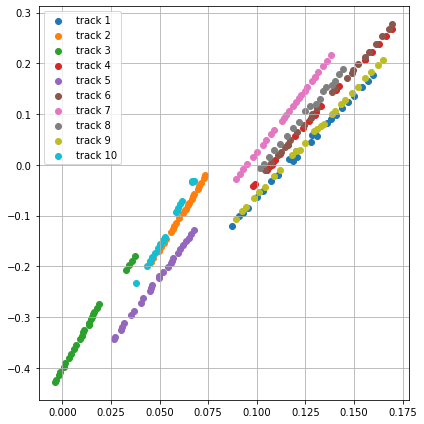

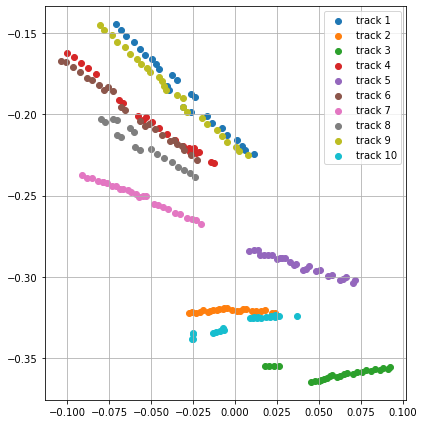

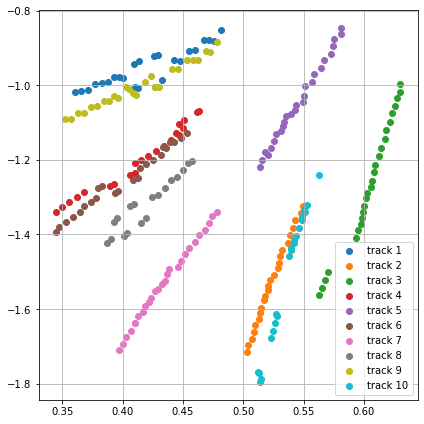

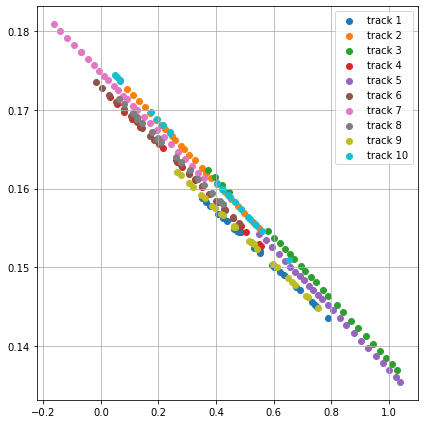

In [43]:
# plot hits in the embedding space
embedding_dims = [(0, 1), (2, 3), (4, 5), (6, 7)]
for id1, id2 in embedding_dims:
    fig = plt.figure(figsize=(6,6))
    for pid in sel_pids:
        # idx = hits.particle_id == pid
        idx = feature_data.pid == pid
        plt.scatter(spatial_np[idx, id1], spatial_np[idx, id2], label='track %d'%pid)
        
    plt.grid(True)
    plt.legend(fontsize=10, loc='best')
    plt.tight_layout()
    plt.savefig("embedding_{}_{}.png".format(id1, id2))
    del fig

### TSNE from 8 dim to 2 dim

- We projected 8D embedding space on 2D space (dim reduction)
- We can use [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) package

In [44]:
from sklearn.manifold import TSNE

In [45]:
spatial_np.shape

(240, 12)

In [46]:
spatial_tsne = TSNE(n_components=2).fit_transform(spatial_np)

/home/adeel/anaconda/envs/exatrkx-cpu/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/adeel/anaconda/envs/exatrkx-cpu/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [47]:
spatial_tsne.shape

(240, 2)

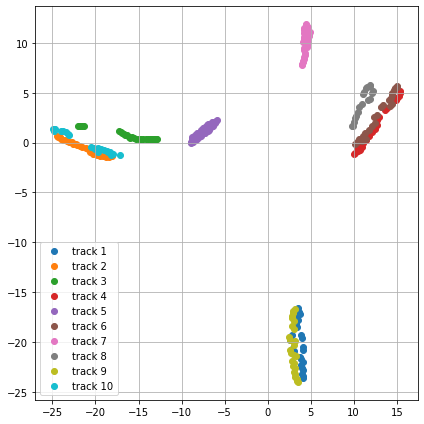

In [48]:
# Using Object Oriented API
plt.close('all')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

# loop over tracks (pids=1,2,...,10)
for pid in sel_pids:
    idx = feature_data.pid == pid
    ax.scatter(spatial_tsne[idx, 0], spatial_tsne[idx, 1], label='track %d'%pid)

ax.legend(fontsize=10, loc='best')
ax.grid(True)
fig.tight_layout()
plt.savefig("embeding-tsne.png")

## _Prepare Data for Plotting Edges_

- Need `x, y, z` for hits
- Corresponding Edges

In [49]:
from LightningModules.Embedding.utils import build_edges

In [50]:
# build edges
e_spatial = build_edges(spatial, spatial, indices=None, r_max=0.1, k_max=100)

In [51]:
# e_spatial.shape

In [52]:
# e_spatial

In [53]:
# get first three pairs/edges. use all rows but cols=0,1,2
# e_spatial[:, 0], e_spatial[:, 1], e_spatial[:, 2]

In [54]:
# convert e_spatial tensor to numpy version e_spatial_np
e_spatial_np = e_spatial.detach().numpy()

In [55]:
# 1st row
# e_spatial_np[0]

In [56]:
# 2nd row
# e_spatial_np[1]

In [57]:
# edge/pair = 1st row first element, 2nd row 1st element
# e_spatial_np[0, 0], e_spatial_np[1, 0]

In [58]:
# hit=1 (0) of one pair is also paired next with hit=13 (12) forming another pair.
# e_spatial_np[0, 1], e_spatial_np[1, 1]

In [59]:
# access hi1=1 (0) in pair 0 and pair 1.
# e_spatial_np[0, 0], e_spatial_np[0, 1]

In [60]:
# Why ???
hits.iloc[[e_spatial[0, 0], e_spatial[0, 1]]].x.values

array([-12.2456, -12.2456], dtype=float32)

### _Ploting Edges_

In [61]:
# remeber r, phi, z in feature_data is in radians (we scaled it with np.pi)
def cylinderical_to_cartesion(r, phi, z):
    """Cylinderical to Catesian Coordinates. Offset scaling [r*100, phi*np.pi, z*100]"""
    theta = phi * np.pi
    x = r * np.cos(theta)*100
    y = r * np.sin(theta)*100
    z = z * 100
    return x, y, z

In [62]:
# lets get transpose of e_spatial
e_spatial_np_t = e_spatial_np.T

In [63]:
e_spatial_np.shape

(2, 1454)

In [64]:
e_spatial_np_t.shape

(1454, 2)

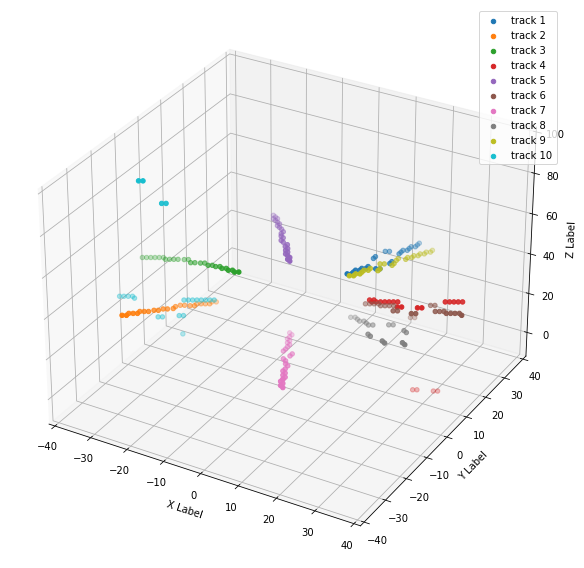

In [65]:
# plotting event from processing stage i.e. feature_data
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for pid in sel_pids:
    idx = feature_data.pid == pid
    x, y, z = cylinderical_to_cartesion(r=feature_data.x[:, 0], phi=feature_data.x[:, 1], z=feature_data.x[:, 2])
    ax.scatter(x[idx], y[idx], z[idx], label='track %d'%pid)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-10, 100)
ax.legend(fontsize=10, loc='best')
ax.grid(True)
fig.tight_layout()
# plt.savefig(os.path.join(outdir, "embeding-tsne.png"))

/home/adeel/anaconda/envs/exatrkx-cpu/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.array([xs, ys, zs, np.ones_like(xs)])
/home/adeel/anaconda/envs/exatrkx-cpu/lib/python3.8/site-packages/mpl_toolkits/mplot3d/proj3d.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([xs, ys,

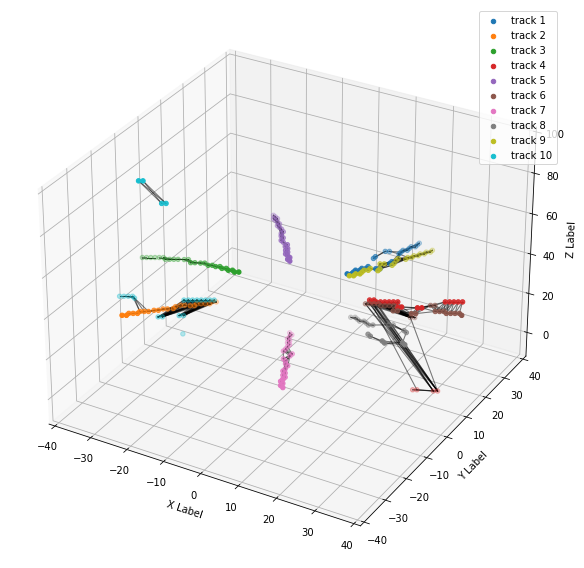

In [66]:
# plot edges 3D: data from processing stage, edges from embedding stage
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
for pid in sel_pids:
    idx = feature_data.pid == pid
    x, y, z = cylinderical_to_cartesion(r=feature_data.x[:, 0], phi=feature_data.x[:, 1], z=feature_data.x[:, 2])
    ax.scatter(x[idx], y[idx], z[idx], label='track %d'%pid)


# add edges (hits=runs from 0 to 256, edges goes all the way to 5)
e_spatial_np_t = e_spatial_np.T
for iedge in range(e_spatial_np.shape[1]):
    x, y, z = cylinderical_to_cartesion(r=feature_data.x[:, 0], phi=feature_data.x[:, 1], z=feature_data.x[:, 2])
    ax.plot(x[e_spatial_np_t[iedge]], y[e_spatial_np_t[iedge]], z[e_spatial_np_t[iedge]], color='k', alpha=0.3, lw=1.)
    

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-10, 100)
ax.legend(fontsize=10, loc='best')
ax.grid(True)
fig.tight_layout()
# plt.savefig(os.path.join(outdir, "emedding_edges_3d.pdf"))

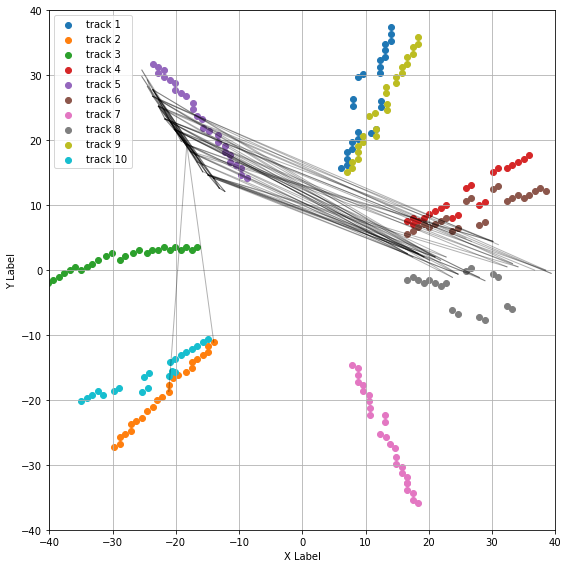

In [67]:
# plot edges 2D: data from processing stage, edges from embedding stage
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
for pid in sel_pids:
    idx = feature_data.pid == pid
    x, y, z = cylinderical_to_cartesion(r=feature_data.x[:, 0], phi=feature_data.x[:, 1], z=feature_data.x[:, 2])
    ax.scatter(x[idx], y[idx], label='track %d'%pid)

# add edges (hits=runs from 0 to 256, edges goes all the way to 5)
e_spatial_np_t = e_spatial_np.T
# for iedge in range(e_spatial_np.shape[1]):
for iedge in range(100):
    ax.plot(hits.iloc[e_spatial_np_t[iedge]].x.values, hits.iloc[e_spatial_np_t[iedge]].y.values, color='k', alpha=0.3, lw=1.)
    
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.legend(fontsize=10, loc='best')
ax.grid(True)
fig.tight_layout()
# plt.savefig(os.path.join(outdir, "embedding_edges_x_y.pdf"))

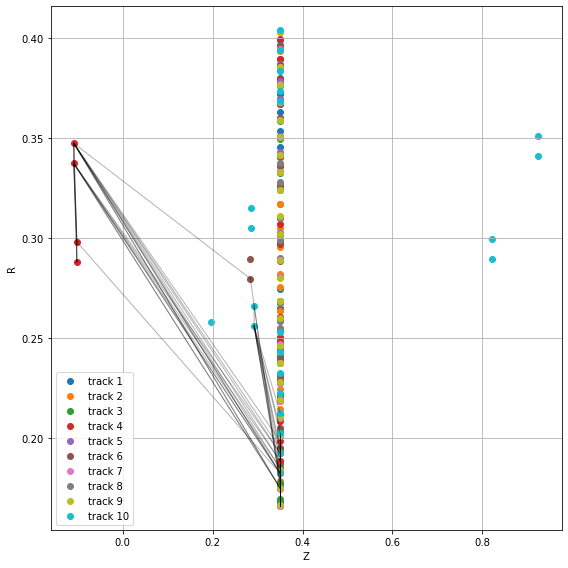

In [68]:
# plot edges 2D: data from processing stage, edges from embedding stage
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
for pid in sel_pids:
    idx = feature_data.pid == pid
    ax.scatter(feature_data.x[:, 2][idx], feature_data.x[:, 0][idx], label='track %d'%pid)

# add edges
e_spatial_np_t = e_spatial_np.T
# for iedge in range(e_spatial_np.shape[1]):
for iedge in range(100):
    ax.plot(feature_data.x[:, 2][e_spatial_np_t[iedge]], feature_data.x[:, 0][e_spatial_np_t[iedge]], color='k', alpha=0.3, lw=1.)

ax.set_xlabel('Z')
ax.set_ylabel('R')
#ax.set_xlim(-40, 100)
#ax.set_ylim(0, 50)
ax.legend(fontsize=10, loc='best')
ax.grid(True)
fig.tight_layout()
# plt.savefig(os.path.join(outdir, "embedding_edges_z_r.pdf"))

### Plotting Hists
- following plots need r, phi, z coordinates.